# Load points 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from numpy import *

In [2]:
def readstl(name): 
    STLfile = name
    f=open(STLfile,'r')

    x=[]
    y=[]
    z=[]

    for line in f:
        strarray=line.split()
        if strarray[0]=='vertex':
            x=append(x,double(strarray[1]))
            y=append(y,double(strarray[2]))
            z=append(z,double(strarray[3]))
    
    
    # calculate middle point in every triangle
    xnew = []
    ynew = []
    znew = []

    for i in range(0,len(x),3):
        xnew.append(sum(x[i:i+3])/3)
        ynew.append(sum(y[i:i+3])/3)
        znew.append(sum(z[i:i+3])/3)
    
    print('# of points in %s:' %name, len(xnew))
    
    point = []
    for i in range(len(xnew)):
        point.append([xnew[i],ynew[i],znew[i]])
        
    return point

In [3]:
def draw(points):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x,y,z = [],[],[]
    for point in points:
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])
        
    ax.scatter(x, y, z, '.')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

# Calculate shape bins

In [4]:
import numpy as np
def shape_bins(points):
    
    print('Calculating bins')
    
    N = len(points)
    bins_all = []
    theta_Block = 12
    phi_Block = 6
    dis_Block = 5
    for point_o in points[:]:
        distances = []
        theta = []
        phi = []
        for point in points[:]:
            distance = np.sqrt((point_o[0] - point[0]) ** 2 + (point_o[1] - point[1]) ** 2 + \
                               (point_o[2] - point[2]) ** 2 )
            if distance != 0:
                distances.append(distance)
                part_distance = np.sqrt((point[0] - point_o[0]) ** 2 + (point[1] - point_o[1]) ** 2)
                
                angl = np.arccos(np.abs(point[0] - point_o[0]) / part_distance)
                
                if point[1] - point_o[1] < 0 and point[0] - point_o[0] < 0:
                    angl = angl + np.pi
                elif point[1] - point_o[1] < 0 and point[0] - point_o[0] > 0:
                    angl = np.pi * 2 - angl
                elif point[1] - point_o[1] > 0 and point[0] - point_o[0] < 0:
                    angl = angl + np.pi / 2
                theta.append(angl)  
                
                phiangl = np.arccos(part_distance / distance)
                
                if point[2] - point_o[2] < 0:
                    phiangl = -1 * angl
                
                phi.append(phiangl)  
                
        mean_dist = np.mean(distances)
        distances = distances / mean_dist

        block_lens = 0.5
        distances_log = np.log(distances / block_lens)

        for x in range(len(distances_log)):
            if distances_log[x] <= 0:
                distances_log[x] = 0
            elif distances_log[x] <= 1:
                distances_log[x] = 1
            elif distances_log[x] <= 2:
                distances_log[x] = 2
            elif distances_log[x] <= 3:
                distances_log[x] = 3
            elif distances_log[x] <= 4:
                distances_log[x] = 4
        
        for x in range(len(phi)):
            if -np.pi/2 <= phi[x] <= -np.pi/3:
                phi[x] = 0
            elif -np.pi/3 < phi[x] <= -np.pi/6:
                phi[x] = 1
            elif -np.pi/6 < phi[x] <= 0:
                phi[x] = 2
            elif 0 < phi[x] <= np.pi/6:
                phi[x] = 3
            elif np.pi/6 < phi[x] <= np.pi/3:
                phi[x] = 4
            elif np.pi/3 < phi[x] <= np.pi/2:
                phi[x] = 5
                
        for x in range(len(theta)):
            if 0 < theta[x] <= np.pi/6:
                theta[x] = 0
            elif np.pi/6 < theta[x] <= np.pi/3:
                theta[x] = 1
            elif np.pi/3 < theta[x] <= np.pi/2:
                theta[x] = 2
            elif np.pi/2 < theta[x] <= 2*np.pi/3:
                theta[x] = 3
            elif 2*np.pi/3 < theta[x] <= 5*np.pi/6:
                theta[x] = 4
            elif 5*np.pi/6 < theta[x] <= np.pi:
                theta[x] = 5
            elif np.pi < theta[x] <= 7*np.pi/6:
                theta[x] = 6
            elif 7*np.pi/6 < theta[x] <= 4*np.pi/3:
                theta[x] = 7
            elif 4*np.pi/3 < theta[x] <= 3*np.pi/2:
                theta[x] = 8
            elif 3*np.pi/2 < theta[x] <= 5*np.pi/3:
                theta[x] = 9
            elif 5*np.pi/3 < theta[x] <= 11*np.pi/6:
                theta[x] = 10
            elif 11*np.pi/6 < theta[x] <= 2*np.pi:
                theta[x] = 11

        bins = np.zeros((dis_Block, theta_Block, phi_Block))
        for x in range(len(distances_log)):
            bins[int(distances_log[x]), int(theta[x]), int(phi[x])] =  \
            bins[int(distances_log[x]), int(theta[x]), int(phi[x])] + 1
            
        bins = np.reshape(bins,[phi_Block*theta_Block*dis_Block])
        bins_all.append(bins)
    return bins_all

# calculate Cost Matrix

In [5]:
def cost_matrix(bins_A,bins_B):
    print('Calculating cost matrix')
    
    row = 0
    col = 0
    cost = np.zeros((len(bins_A), len(bins_B)))
    for bin_A in bins_A:
        col = 0
        for bin_B in bins_B:
            cost[row, col] = 0.5 * np.sum(((bin_A - bin_B) ** 2) / (bin_A + bin_B + 0.00000001))
            col = col + 1
        row = row + 1

    return cost

# Munkres to find minimum

O(N^3) time complexity.

When the # of points increse, it will cost large amount of time.

We will use Soft Assignment method instead.

In [ ]:
import copy
from munkres import Munkres

In [ ]:
def cal_munkres(cost_matrix):
    print('Calculating munkres')
    matrix = copy.deepcopy(cost_matrix)
    m = Munkres()
    indexes = m.compute(matrix)
    total = 0
    
    for row, column in indexes:
        value = cost_matrix[row][column]
        total += value

    print ('minimum cost =%d' % total)
    return total

# Soft Assignment 

In [6]:
import copy

In [7]:
def soft_assign(cost_matrix):
    print('Calculating soft assignment')
    total = 0
    matrix = copy.deepcopy(cost_matrix)
    
    for i in range(len(cost_matrix)):
        candidate = []
        
        min_C = np.min(cost_matrix[i])
        max_C = np.max(cost_matrix[i])
        sigma_i = np.sqrt(np.sum((matrix[i] - min_C)**2))
        epsilon_i = sigma_i * np.abs(max_C - min_C)
        
        for j in range(len(cost_matrix[0])):
            if cost_matrix[i][j] <= min_C + epsilon_i:
                candidate.append(cost_matrix[i][j])       
        k_i = len(candidate)
    
        for k in range(k_i):
            weight_i = (min_C + epsilon_i - candidate[k])/(k_i * epsilon_i)
            total += weight_i * candidate[k]
    total /= len(cost_matrix)
    print('minimum cost =%d' % total)
    return total
            

# Main Function with NN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
point1 = readstl('S1.stl')[::10]
bin1 = shape_bins(point1)
y = np.ones(len(bin1))
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100, 2))
clf.fit(bin1, y) 
point2 = readstl('G2.stl')[::100]
bin2 = shape_bins(point2)
clf.predict(bin2)


# Main function using Hungarian method

In [8]:
from sklearn.utils import resample

In [ ]:
# compare the different class
# find the dissimilarity between the two classes

result = []

for i in range(1,5):  
    for j in range(1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) > 2000:
            point1 = resample(point1, replace=False, n_samples=2000,random_state=123)
        elif len(point1) < 2000:
            point1 = resample(point1, replace=True, n_samples=2000,random_state=123)
        
        if len(point2) > 2000:
            point2 = resample(point2, replace=False, n_samples=2000,random_state=123)
        elif len(point2) < 2000:
            point2 = resample(point2, replace=True, n_samples=2000,random_state=123)
        
        print('resample points to ',len(point1))

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = cal_munkres(cost)
        
        result.append(total)

        print('---------------------')


In [ ]:
print(result)

In [ ]:
plt.plot(result)
plt.ylabel('minimum distance')
plt.ylim(0,max(result)*1.5)
 
plt.show()
print(np.mean(result))

In [ ]:
result2 = []
p = [1,2,3,4,5]

for i in range(1,6):  
    cur = []  
    q = p[:i-1] + p[i:]
    for j in q:
        
        point1 = readstl('G%d.stl'%i)[::80]
        point2 = readstl('G%d.stl'%j)[::80]

        if len(point1) > len(point2):
            point2 = resample(point2, replace=True, n_samples=len(point1),random_state=123)
        elif len(point1) < len(point2):
            point1 = resample(point1, replace=True, n_samples=len(point2),random_state=123)

        print('resample points to ',len(point1))


        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = cal_munkres(cost)
        
        cur.append(total)

        print('---------------------')
    
    result2.append(np.mean(cur))

In [ ]:
print(result2)

In [ ]:
plt.plot(result2)
plt.ylabel('minimum distance')
plt.ylim(0,max(result2)*1.5)
plt.show()
print(np.mean(result2))

# Main function using SA

# of points in S1.stl: 7558
# of points in G1.stl: 2934
resample points1 to 3779
resample points2 to 2934


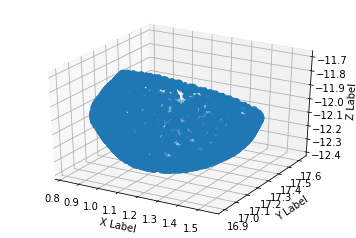

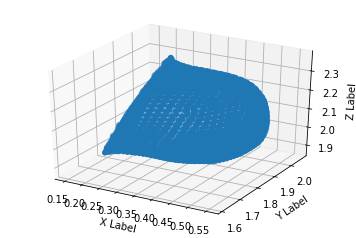

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =2224
---------------------
# of points in S1.stl: 7558
# of points in G2.stl: 12580
resample points1 to 7558
resample points2 to 12580


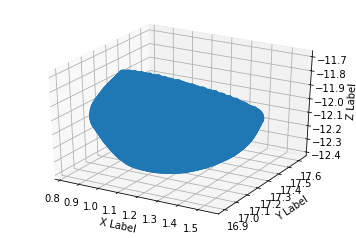

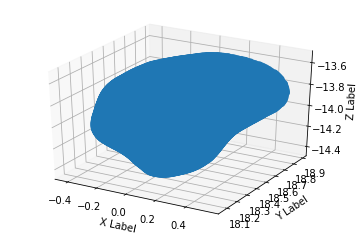

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =6747
---------------------
# of points in S1.stl: 7558
# of points in G3.stl: 11040
resample points1 to 7558
resample points2 to 11040


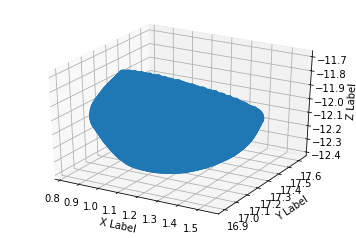

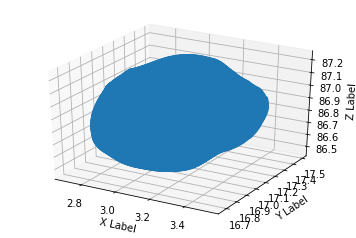

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =6166
---------------------
# of points in S1.stl: 7558
# of points in G4.stl: 1910
resample points1 to 2520
resample points2 to 1910


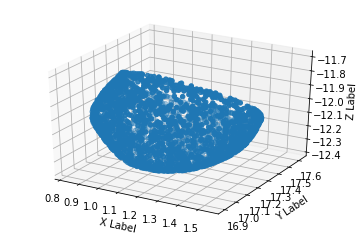

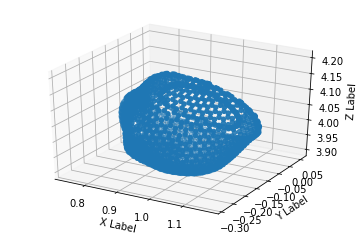

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1448
---------------------
# of points in S2.stl: 14896
# of points in G1.stl: 2934
resample points1 to 2980
resample points2 to 2934


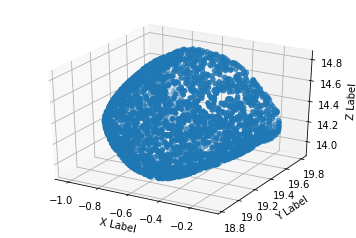

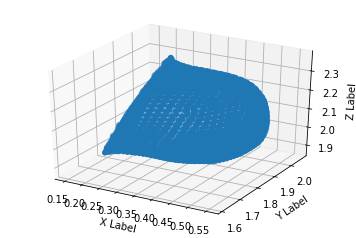

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1886
---------------------
# of points in S2.stl: 14896
# of points in G2.stl: 12580
resample points1 to 14896
resample points2 to 12580


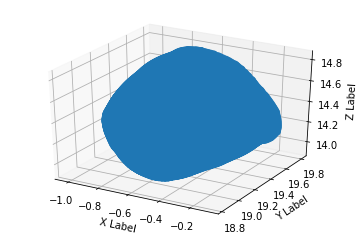

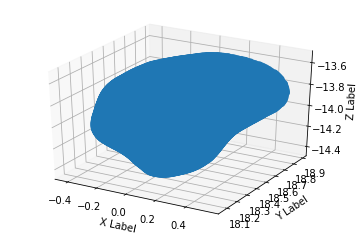

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =8661
---------------------
# of points in S2.stl: 14896
# of points in G3.stl: 11040
resample points1 to 14896
resample points2 to 11040


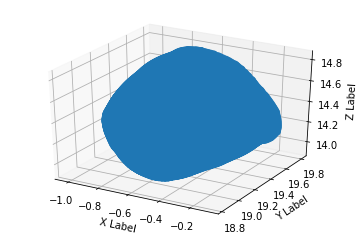

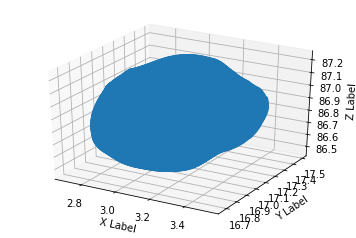

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =8246
---------------------
# of points in S2.stl: 14896
# of points in G4.stl: 1910
resample points1 to 2128
resample points2 to 1910


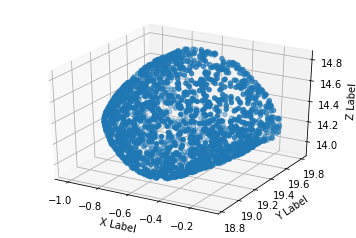

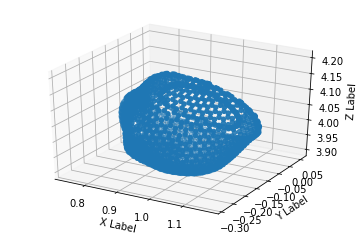

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1298
---------------------
# of points in S3.stl: 806
# of points in G1.stl: 2934
resample points1 to 806
resample points2 to 978


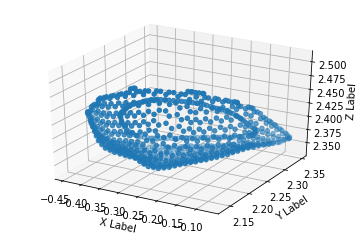

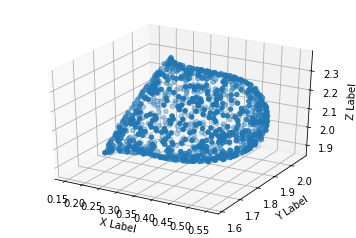

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =617
---------------------
# of points in S3.stl: 806
# of points in G2.stl: 12580
resample points1 to 806
resample points2 to 839


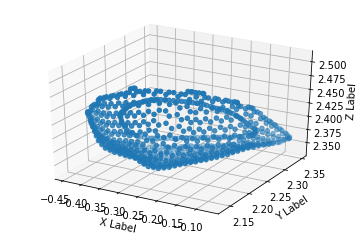

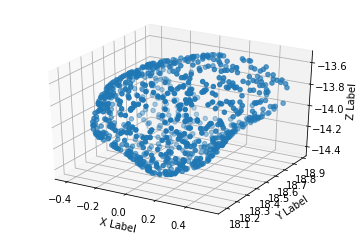

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =561
---------------------
# of points in S3.stl: 806
# of points in G3.stl: 11040
resample points1 to 806
resample points2 to 850


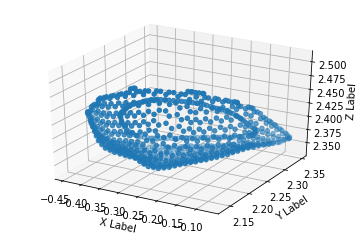

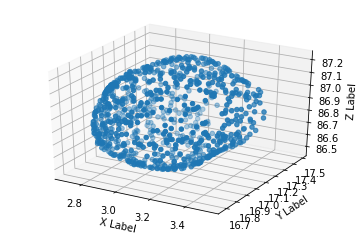

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =570
---------------------
# of points in S3.stl: 806
# of points in G4.stl: 1910
resample points1 to 806
resample points2 to 955


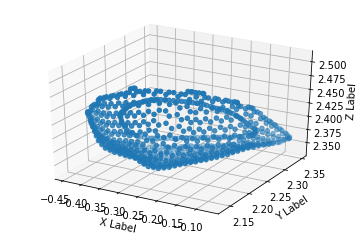

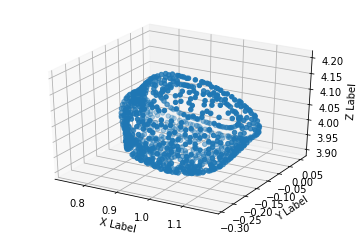

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =596
---------------------
# of points in S4.stl: 2164
# of points in G1.stl: 2934
resample points1 to 2164
resample points2 to 2934


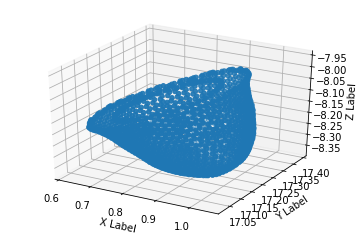

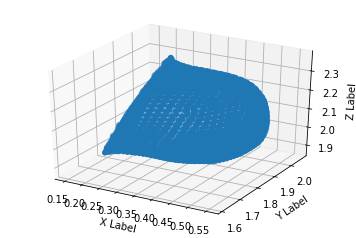

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1654
---------------------
# of points in S4.stl: 2164
# of points in G2.stl: 12580
resample points1 to 2164
resample points2 to 2516


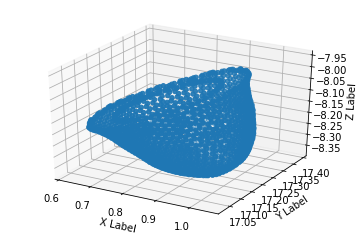

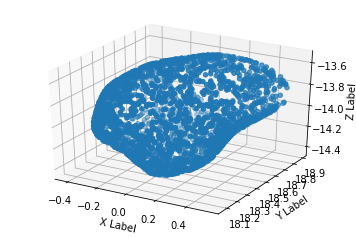

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1506
---------------------
# of points in S4.stl: 2164
# of points in G3.stl: 11040
resample points1 to 2164
resample points2 to 2208


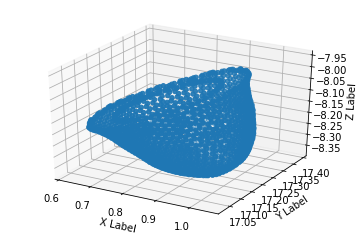

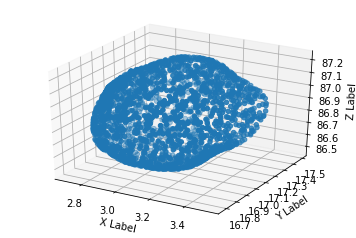

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1408
---------------------
# of points in S4.stl: 2164
# of points in G4.stl: 1910
resample points1 to 2164
resample points2 to 1910


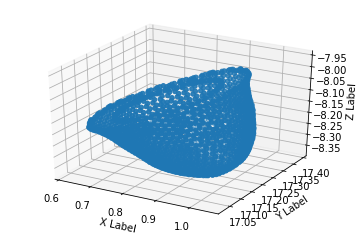

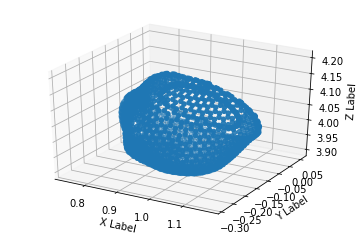

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1329
---------------------


In [9]:
result = []

for i in range(1,5):  
    for j in range(1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))
            
        draw(point1)
        draw(point2)
        
        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)
        
        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result.append(total)

        print('---------------------')

[2224.2914478412358, 6747.3520771715557, 6166.630193736396, 1448.0234791507439, 1886.825633332453, 8661.9428289946136, 8246.4964486169592, 1298.0324853764107, 617.70314915318841, 561.78061231834545, 570.32212007734142, 596.45052849459444, 1654.1658769511416, 1506.2950860679223, 1408.7382242693261, 1329.3561195335933]


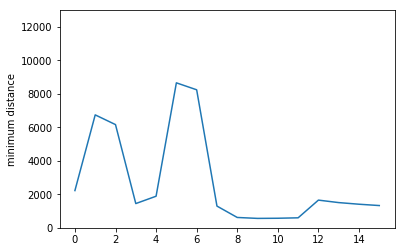

2807.77539444


In [12]:
print(result)
plt.plot(result)
plt.ylabel('minimum distance')
plt.ylim(0,max(result)*1.5)
plt.show()
print(np.mean(result))

# of points in G1.stl: 2934
# of points in G2.stl: 12580
resample points1 to 2934
resample points2 to 3145


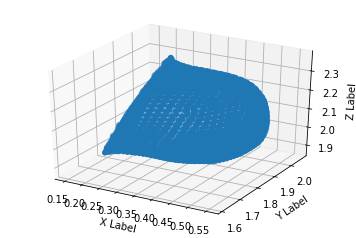

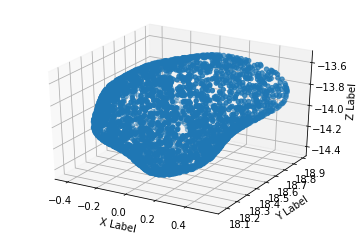

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1960
---------------------
# of points in G1.stl: 2934
# of points in G3.stl: 11040
resample points1 to 2934
resample points2 to 3680


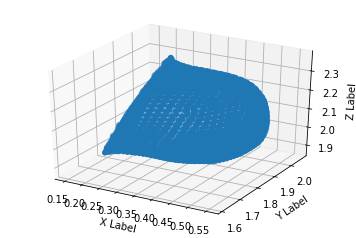

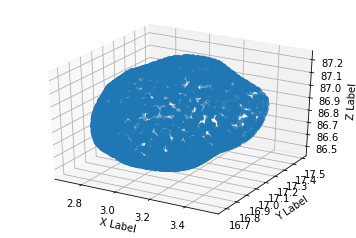

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =2134
---------------------
# of points in G1.stl: 2934
# of points in G4.stl: 1910
resample points1 to 2934
resample points2 to 1910


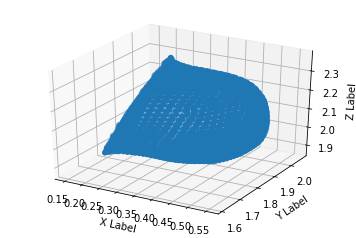

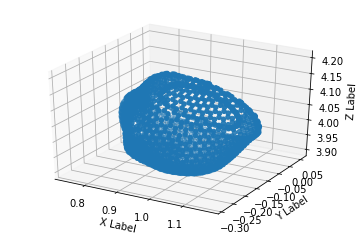

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1614
---------------------
# of points in G2.stl: 12580
# of points in G3.stl: 11040
resample points1 to 12580
resample points2 to 11040


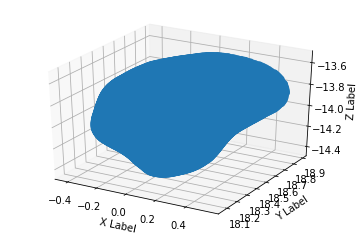

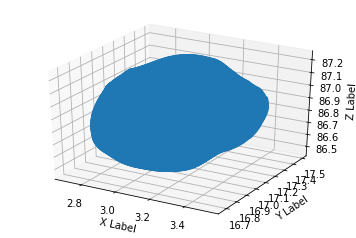

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =7526
---------------------
# of points in G2.stl: 12580
# of points in G4.stl: 1910
resample points1 to 2097
resample points2 to 1910


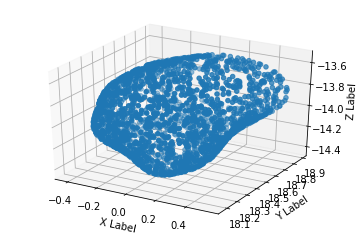

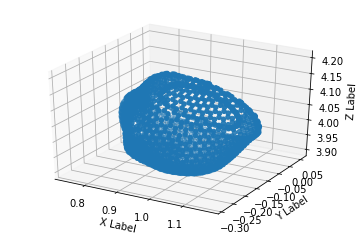

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1311
---------------------
# of points in G3.stl: 11040
# of points in G4.stl: 1910
resample points1 to 2208
resample points2 to 1910


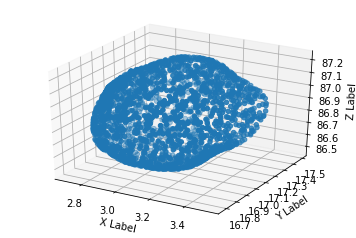

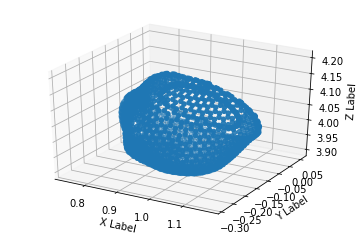

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =1340
---------------------


In [10]:
result2 = []


for i in range(1,5):
    
    for j in range(i+1,5):
        
        point1 = readstl('G%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))
        draw(point1)
        draw(point2)

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result2.append(total)

        print('---------------------')
    

[1960.4702323239355, 2134.9784568119644, 1614.7268518497876, 7526.6367455776026, 1311.1827788444809, 1340.3508513784702]


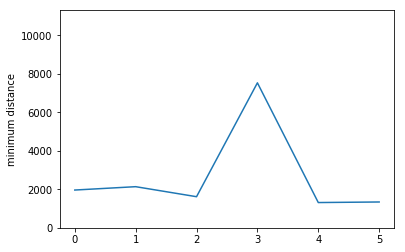

2648.0576528


In [13]:
print(result2)
plt.plot(result2)
plt.ylabel('minimum distance')
plt.ylim(0,max(result2)*1.5)
plt.show()
print(np.mean(result2))

# of points in S1.stl: 7558
# of points in S2.stl: 14896
resample points1 to 7558
resample points2 to 14896


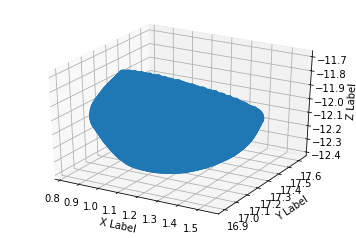

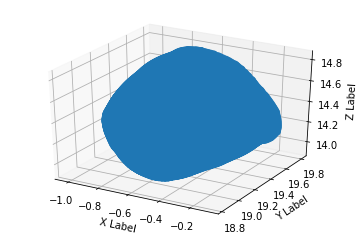

Calculating bins
Calculating bins
Calculating cost matrix


KeyboardInterrupt: 

In [11]:
result3 = []

for i in range(1,5):  
    for j in range(i+1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('S%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))
            
        draw(point1)
        draw(point2)

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result3.append(total)

        print('---------------------')
    

In [ ]:
print(result3)
plt.plot(result3)
plt.ylabel('minimum distance')
plt.ylim(0,max(result3)*1.5)
plt.show()
print(np.mean(result3))

# Test 

# of points in S5.stl: 706
# of points in S1.stl: 7558
resample points1 to 706
resample points2 to 756


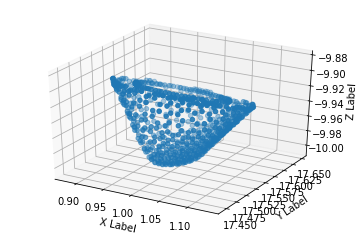

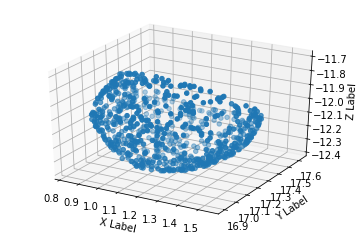

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =489
---------------------
# of points in S5.stl: 706
# of points in S2.stl: 14896
resample points1 to 706
resample points2 to 710


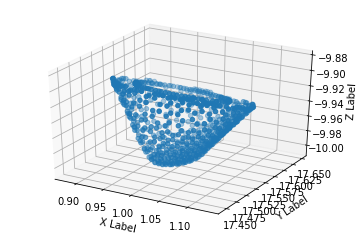

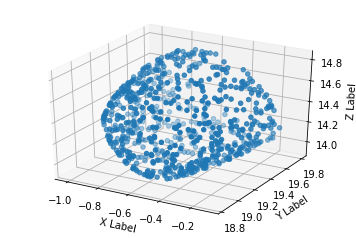

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =473
---------------------
# of points in S5.stl: 706
# of points in S3.stl: 806
resample points1 to 706
resample points2 to 806


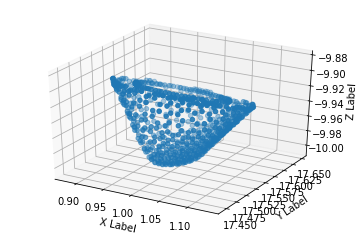

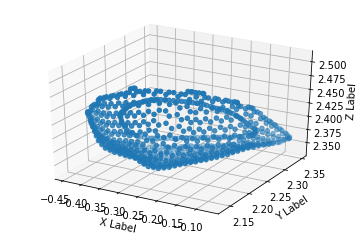

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =515
---------------------
# of points in S5.stl: 706
# of points in S4.stl: 2164
resample points1 to 706
resample points2 to 722


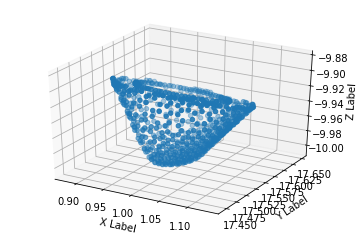

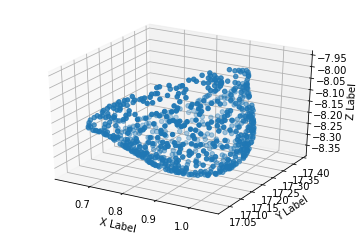

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =476
---------------------


In [10]:
# test stable one with each class

resultt1 = []

for i in range(1,5):  
        
    point1 = readstl('S5.stl')
    point2 = readstl('S%d.stl'%i)

    if len(point1) >= len(point2):
        n = len(point1)//len(point2)
        point1 = point1[::n]
    else:
        n = len(point2)//len(point1)
        point2 = point2[::n]

    print('resample points1 to',len(point1))
    print('resample points2 to',len(point2))

    draw(point1)
    draw(point2)

    bin1 = shape_bins(point1)
    bin2 = shape_bins(point2)

    cost = cost_matrix(bin1,bin2)

    total = soft_assign(cost)

    resultt1.append(total)

    print('---------------------')

# of points in S5.stl: 706
# of points in G1.stl: 2934
resample points1 to 706
resample points2 to 734


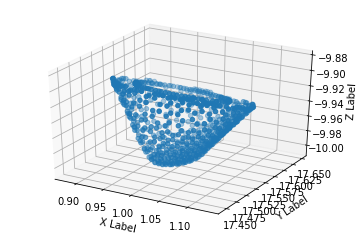

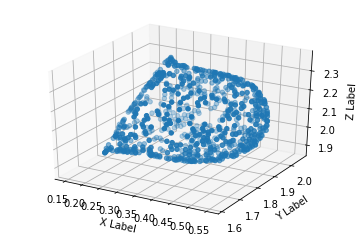

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =483
---------------------
# of points in S5.stl: 706
# of points in G2.stl: 12580
resample points1 to 706
resample points2 to 740


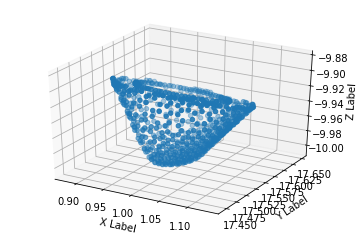

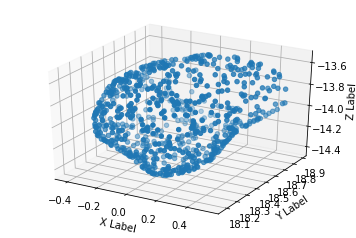

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =487
---------------------
# of points in S5.stl: 706
# of points in G3.stl: 11040
resample points1 to 706
resample points2 to 736


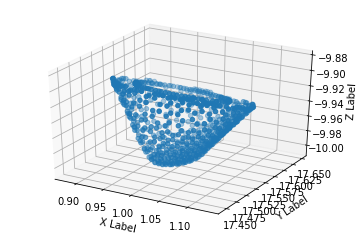

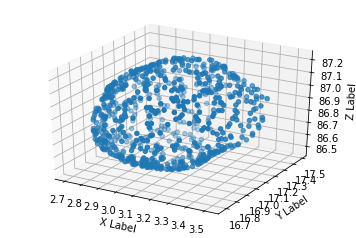

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =485
---------------------
# of points in S5.stl: 706
# of points in G4.stl: 1910
resample points1 to 706
resample points2 to 955


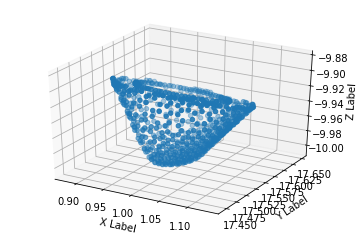

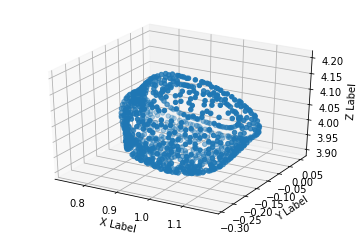

Calculating bins
Calculating bins
Calculating cost matrix
Calculating soft assignment
minimum cost =549
---------------------


In [11]:

resultt2 = []

for i in range(1,5):  
        
    point1 = readstl('S5.stl')
    point2 = readstl('G%d.stl'%i)

    if len(point1) >= len(point2):
        n = len(point1)//len(point2)
        point1 = point1[::n]
    else:
        n = len(point2)//len(point1)
        point2 = point2[::n]

    print('resample points1 to',len(point1))
    print('resample points2 to',len(point2))

    draw(point1)
    draw(point2)

    bin1 = shape_bins(point1)
    bin2 = shape_bins(point2)

    cost = cost_matrix(bin1,bin2)

    total = soft_assign(cost)

    resultt2.append(total)

    print('---------------------')

[489.29731439201504, 473.19474348368772, 515.88886202885385, 476.48125237811479]
[483.31722168614971, 487.71049690294524, 485.14182016439372, 549.23487532419404]


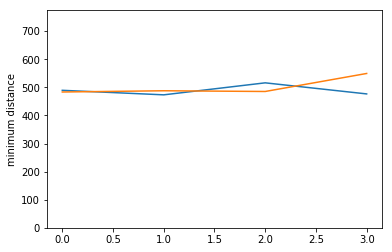

488.715543071
488.715543071


In [12]:
print(resultt1)
print(resultt2)
plt.plot(resultt1)
plt.plot(resultt2)
plt.ylabel('minimum distance')
plt.ylim(0,max(resultt1)*1.5)
plt.show()
print(np.mean(resultt1))
print(np.mean(resultt1))